In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

# 1. Загрузить файл auto.csv.

In [81]:
auto = pd.read_csv('auto.csv')

In [4]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
auto.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
7,1,158,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
146,0,89,subaru,gas,std,four,wagon,fwd,front,97.0,...,108,2bbl,3.62,2.64,9.00,82,4800,28,32,7463
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
78,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.40,68,5500,31,38,6669
121,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.50,143,5500,19,27,22018
88,-1,137,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.50,116,5500,23,30,9279
155,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.00,62,4800,27,32,8778
21,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572
9,0,192,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,23875


In [7]:
len(auto.index)

205

In [8]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [9]:
auto.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

В наших данных нет пропущенных значений:

In [10]:
 auto.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [56]:
import statistics

[Как найти числовые столбцы в Pandas?](https://fooobar.com/questions/133797/how-do-i-find-numeric-columns-in-pandas)

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = auto.select_dtypes(include=numerics)

In [55]:
newdf

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [12]:
auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
mean - среднее
min - минимальное
max - максимальное
std - среднее отклонение

ВЫШЕУКАЗАННАЯ ТАБЛИЦА ПРЕДСТАВИЛА МНОГО ПАРАМЕТРОВ НУЖНО УКАЗАТЬ ЕЩЁ МОДУ И МЕДИАНУ

In [21]:
?statistics

In [38]:
headers = list(newdf.columns.values)

In [16]:
print('Медиана: ', statistics.median(auto['symboling']))

Медиана:  1


In [72]:
#Подсчёт моды
def mode(header):
    try:
        print('Значение моды: ', statistics.mode(newdf[header]))
    except:
        print('Метод statistics не сработал!')

In [73]:
for header in headers:
    print (header)
    #aim = str(header)
    print('Медиана: ', statistics.median(newdf[header]))
    #print('Значение моды: ', statistics.mode(newdf[header]))
    mode(header)
    print('------------------------------')

symboling
Медиана:  1
Значение моды:  0
------------------------------
normalized-losses
Медиана:  122
Значение моды:  161
------------------------------
wheel-base
Медиана:  97.0
Значение моды:  94.5
------------------------------
length
Медиана:  173.2
Значение моды:  157.3
------------------------------
width
Медиана:  65.5
Значение моды:  63.8
------------------------------
height
Медиана:  54.1
Значение моды:  50.8
------------------------------
curb-weight
Медиана:  2414
Значение моды:  2385
------------------------------
engine-size
Медиана:  120
Метод statistics не сработал!
------------------------------
bore
Медиана:  3.31
Значение моды:  3.62
------------------------------
stroke
Медиана:  3.29
Значение моды:  3.4
------------------------------
compression-ratio
Медиана:  9.0
Значение моды:  9.0
------------------------------
horsepower
Медиана:  95
Значение моды:  68
------------------------------
peak-rpm
Медиана:  5200
Значение моды:  5500
------------------------------
c

# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

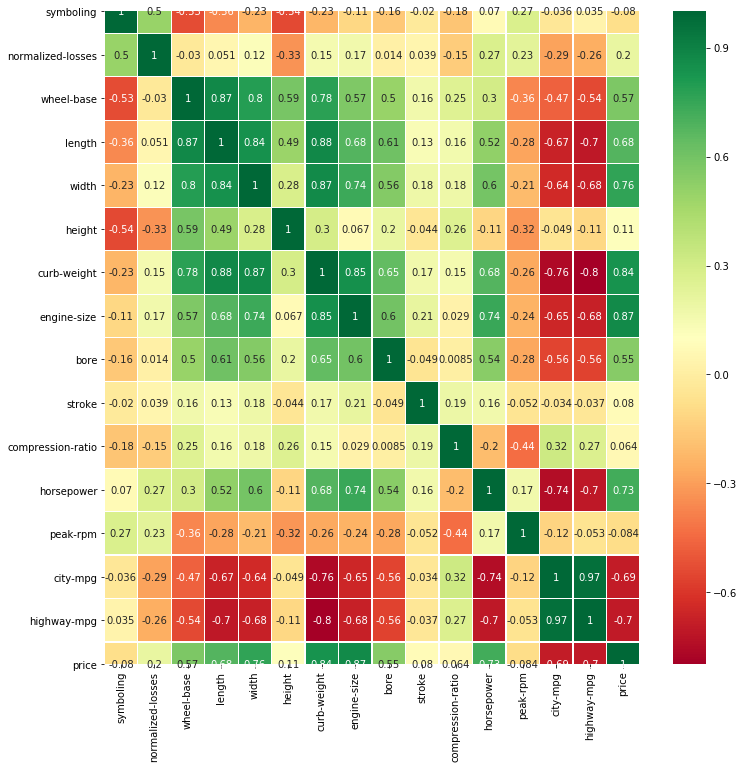

In [75]:
import seaborn as sns
sns.heatmap(auto.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

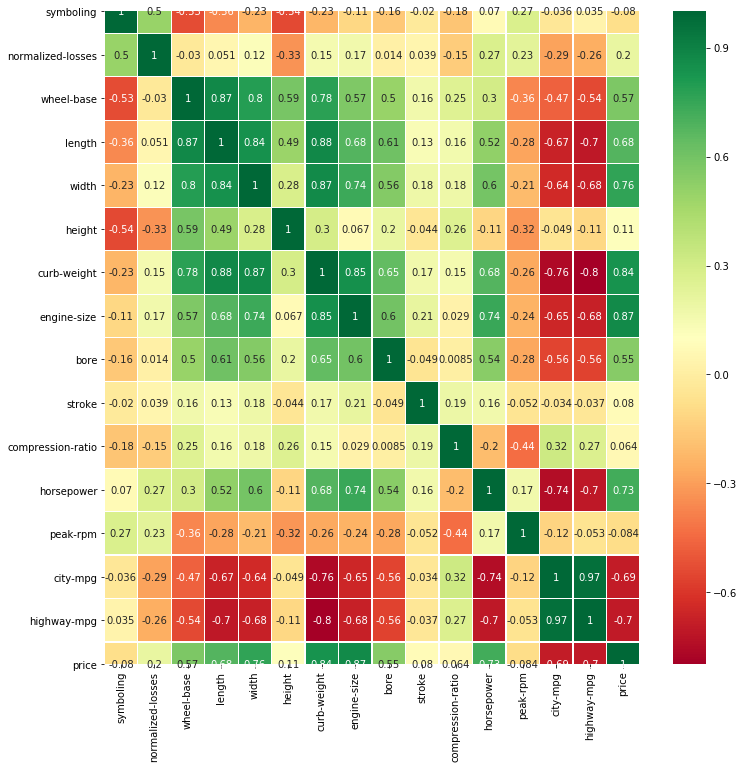

In [76]:
import seaborn as sns
sns.heatmap(newdf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

**Визуализация идёт по числовым столбцам в любом кейсе. :)**

# 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis.

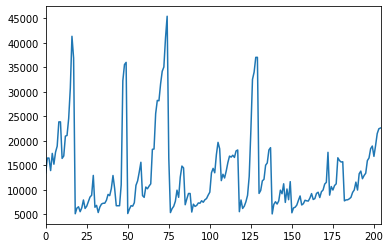

In [79]:
auto['price'].plot()

[Ассиметрия (skewness) и эксцесс (kurtosis)](https://studfile.net/preview/3126503/)

[Как правильно использовать функции scipy skew и kurtosis?](https://fooobar.com/questions/725094/how-to-correctly-use-scipys-skew-and-kurtosis-functions)

skew :  1.7534486514523662
kurt :  2.848082544390688


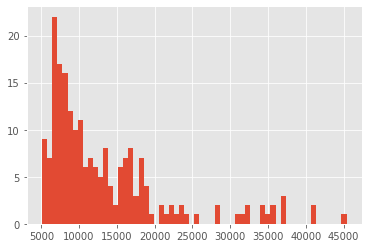

In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib.pyplot as plt

plt.style.use('ggplot')

#data = np.random.normal(0, 1, 10000000)
#np.var(data)

plt.hist(auto['price'], bins=60)

#print("mean : ", np.mean(data))
#print("var  : ", np.var(data))
print("skew : ",skew(auto['price']))
print("kurt : ",kurtosis(auto['price']))

Правосторонняя асимметрия. Высоковершинный эксцесс распределения.

# 5. Визуализировать несколько взаимосвязей между переменными.

In [86]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [88]:
newdf.tail()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114,5400,19,25,22625


# Визуализируем данные

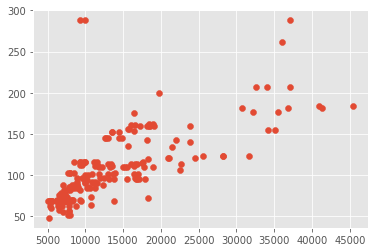

In [89]:
plt.scatter(auto.price, auto.horsepower)
plt.show()

In [ ]:
corr, p_value = pearsonr(duration, avg_vote)
print(corr)

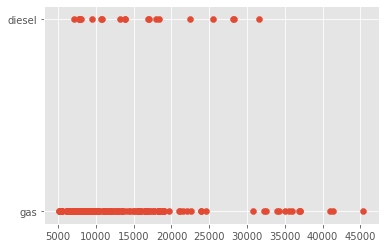

In [85]:
plt.scatter(auto.price, auto['fuel-type'])
plt.show()

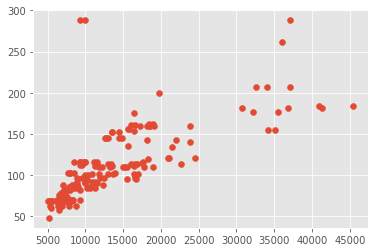

In [90]:
plt.scatter(auto[auto['fuel-type']=='gas'].price, auto[auto['fuel-type']=='gas'].horsepower)
plt.show()

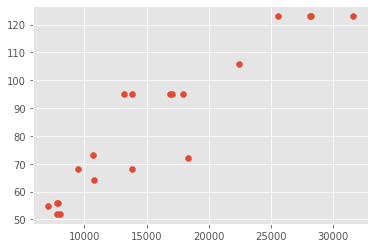

In [91]:
plt.scatter(auto[auto['fuel-type']=='diesel'].price, auto[auto['fuel-type']=='diesel'].horsepower)
plt.show()

По графикам видно, что какое бы ни было топливо, газ или дизель, цена на автомобиль возрастает при росте лошадиных сил.

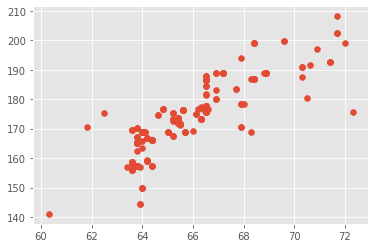

In [102]:
plt.scatter(auto.width, auto.length)
plt.show()

Чем шире автомобиль, тем он длиннее.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


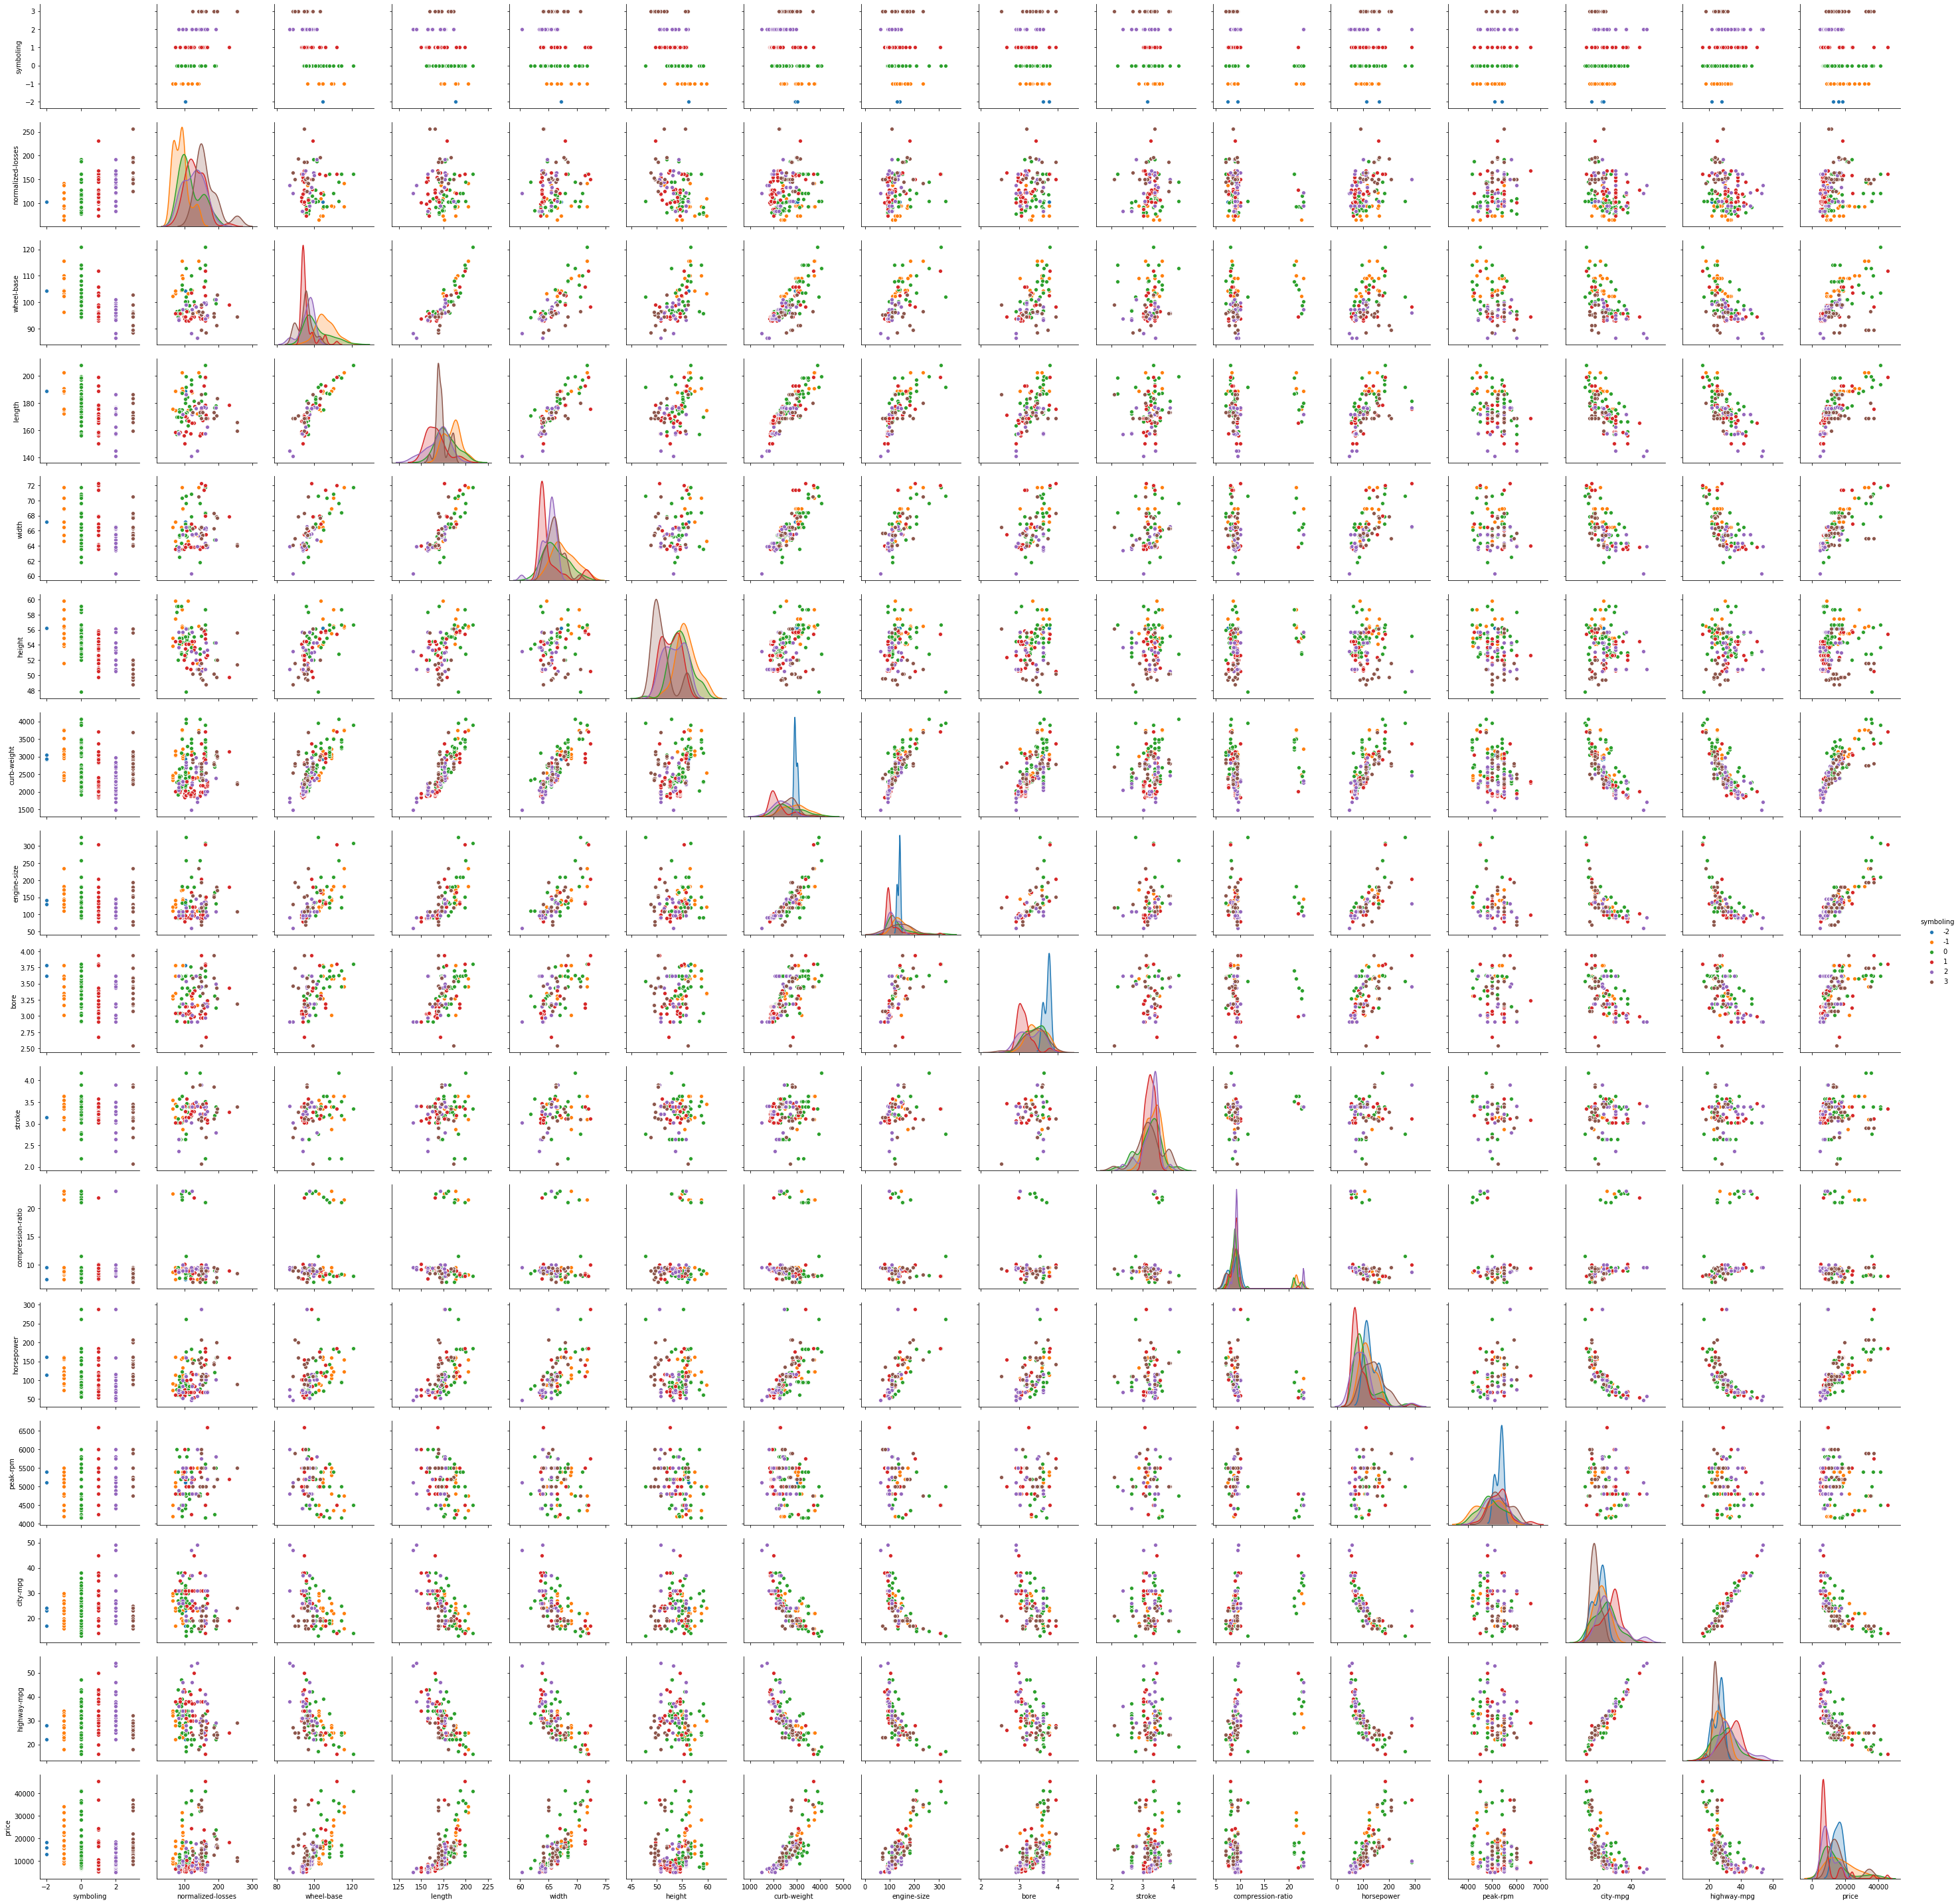

In [50]:
fig = sns.pairplot(data=auto, hue='symboling')
plt.show()

<Figure size 800x640 with 0 Axes>

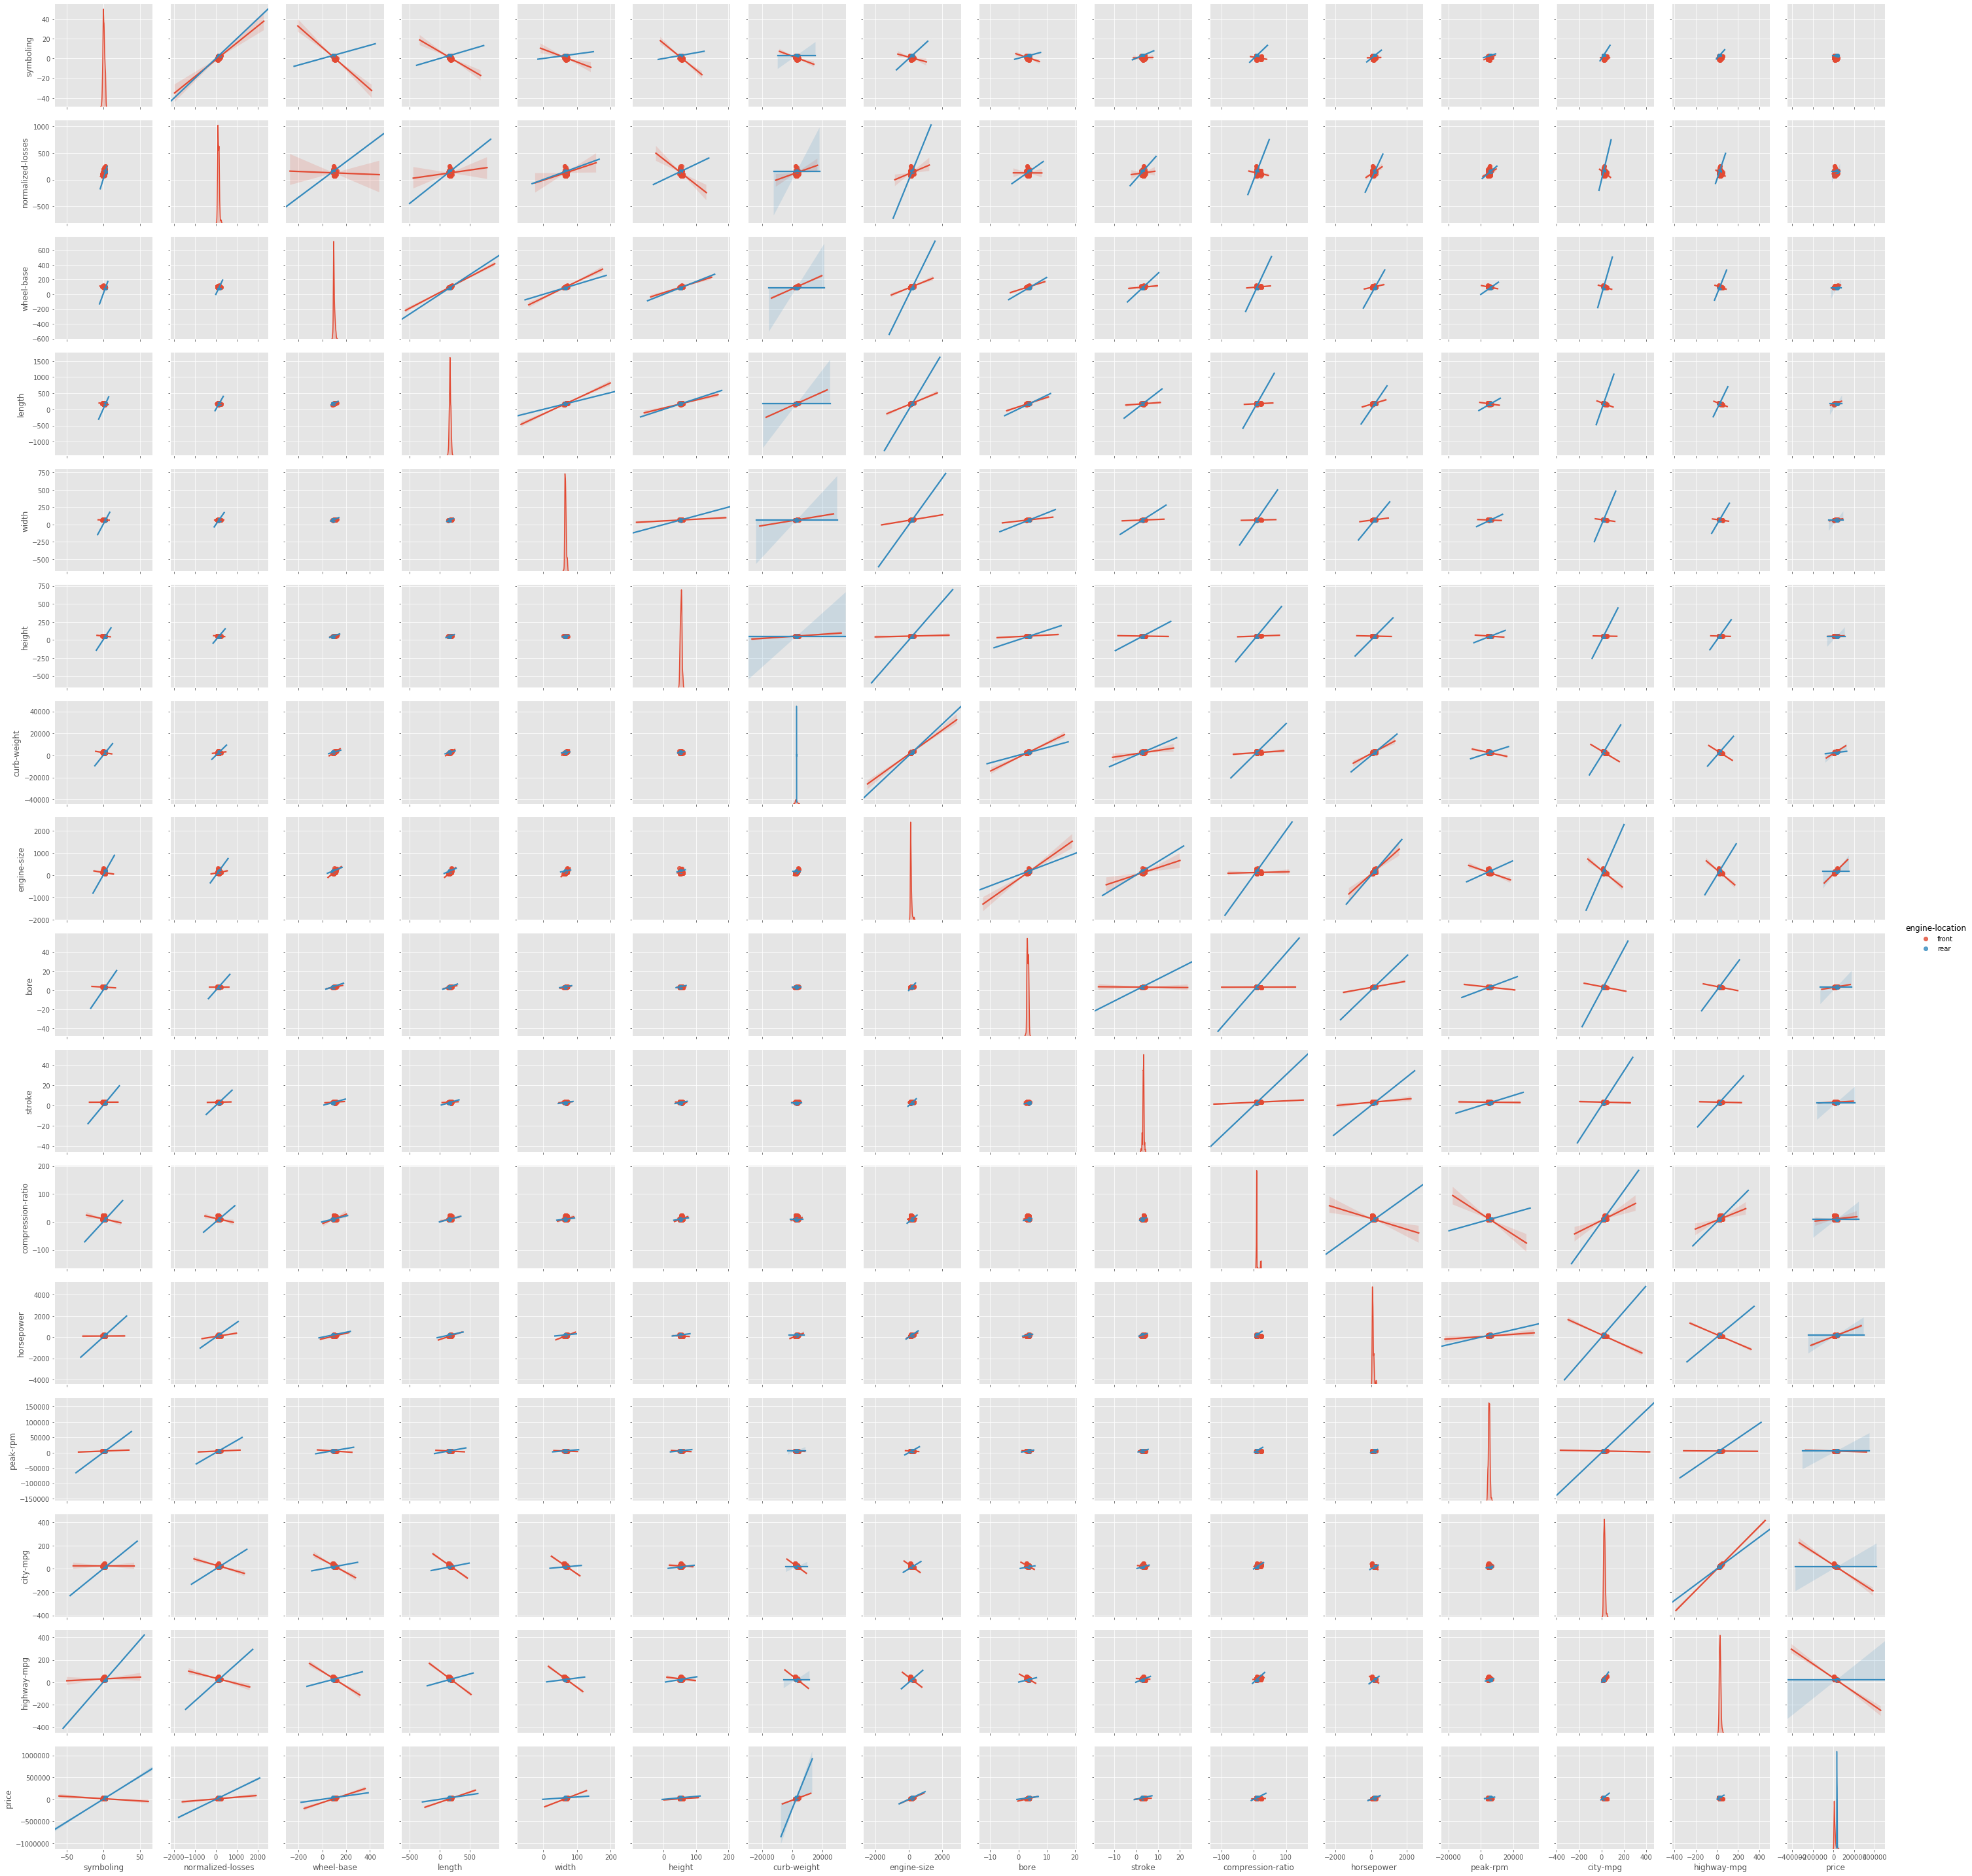

In [93]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(auto, kind="reg", hue="engine-location")
plt.show()

# 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [94]:
stats.ttest_ind(auto.price, auto.horsepower)

Ttest_indResult(statistic=23.337064505286627, pvalue=3.909801820534587e-77)

p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

In [96]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [103]:
import researchpy as rp
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(auto.groupby('engine-location')['width'])

,N,Mean,SD,SE,95% Conf.,Interval
engine-location,,,,,,
front,202,65.921287,2.158264,0.151855,65.622912,66.219662
rear,3,65.000000,0.000000,0.000000,65.000000,65.000000


N - количество элементов
Mean - среднее значение
SD - стандартное отклонение
SE - стандартная ошибка (https://ru.wikipedia.org/wiki/Стандартная_ошибка)

Функция для подсчета t-test: https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [107]:
descriptives, results = rp.ttest(auto['symboling'], auto.price)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,symboling,205.0,0.834146,1.245307,0.086976,0.662659,1.005634
1,price,205.0,13312.712195,8102.472461,565.901224,12196.946885,14428.477505
2,combined,410.0,6656.773171,8783.769974,433.799479,5804.018368,7509.527974


In [108]:
results

,Independent t-test,results
0,Difference (symboling - price) =,-13311.8780
1,Degrees of freedom =,408.0000
2,t =,-23.5233
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-2.3235
7,Hedge's g =,-2.3192
8,Glass's delta =,-10689.6371
9,r =,0.7587


[Что такое MPG в характеристиках американских автомобилей?](https://www.drive2.ru/l/4778647/)

MPG = Miles Per Gallon — то есть то, сколько миль машина может проехать на 1 галлоне топлива.

# Проверим гипотезу о том, что автомобили с показателем num-of-doors = two стоят дешевле

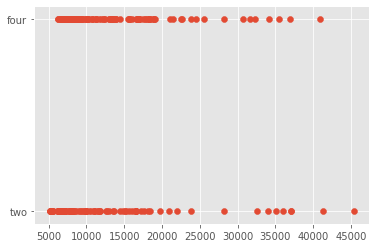

In [118]:
plt.scatter(auto.price, auto['num-of-doors'])
plt.show()

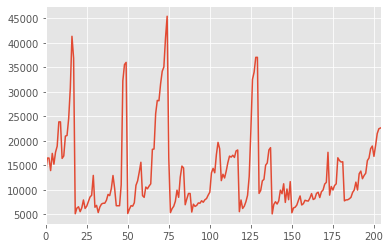

In [122]:
auto['price'].plot()

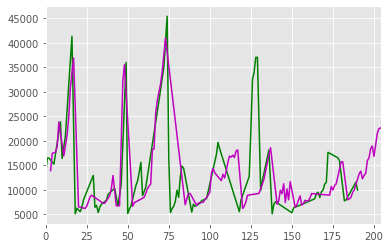

In [132]:
auto[auto['num-of-doors']=='two']['price'].plot(color = 'g')
auto[auto['num-of-doors']!='two']['price'].plot(color = 'm')

In [116]:
price_doors_2 = auto[auto['num-of-doors']=='two'].price
price_doors_4 = auto[auto['num-of-doors']!='two'].price

In [117]:
descriptives, results = rp.ttest(price_cmpg_13, price_cpmg_others)
print(descriptives)
print('_____________________________')
print(results)

   Variable      N          Mean           SD          SE     95% Conf.  \
0     price   89.0  13146.595506  9046.102547  958.884952  11241.013159   
1     price  116.0  13440.163793  7334.883026  681.026792  12091.180788   
2  combined  205.0  13312.712195  8102.472461  565.901224  12196.946885   

       Interval  
0  15052.177853  
1  14789.146798  
2  14428.477505  
_____________________________
              Independent t-test   results
0  Difference (price - price) =  -293.5683
1          Degrees of freedom =   203.0000
2                           t =    -0.2565
3       Two side test p value =     0.7978
4      Difference < 0 p value =     0.3989
5      Difference > 0 p value =     0.6011
6                   Cohen's d =    -0.0361
7                   Hedge's g =    -0.0360
8               Glass's delta =    -0.0325
9                           r =     0.0180


Difference > 0 p value =     0.6011 Различие есть, гипотеза не верна? Как работает ttest?

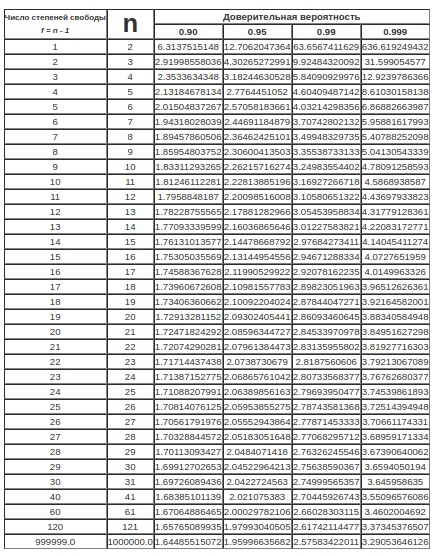

In [93]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)